In [40]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

In [41]:
if not firebase_admin._apps:
  cred = credentials.Certificate('bake-off-auth.json')
  firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://fixe-bake-off-2-ipm-default-rtdb.europe-west1.firebasedatabase.app/'
  })

In [42]:
ref = db.reference('/G3')
new_ref = db.reference('/G03-AL')

In [43]:
data = ref.get()
new_data = new_ref.get()

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="ticks", context="talk")
plt.style.use(["dark_background", {'axes.facecolor': "#151515", 'figure.facecolor': '#151515'}])
sns.set_palette(["#118ab2", "#2a9d8f", "#e9c46a"])
pd.set_option('display.max_rows', 300)

In [45]:
df = pd.DataFrame(data)
aux_df = pd.DataFrame(new_data)
# join both data frames
df = df.join(aux_df)

In [46]:
# transpose the dataframe
df = df.T

In [47]:
# change the row names to new integer indexes
df.index = range(len(df))

In [48]:
# remove the outliers: the ones that are more than 2 standard deviations away from the mean
df = df[np.abs(df['attempt_duration'] - df['attempt_duration'].mean()) <= (2 * df['attempt_duration'].std())]
# also remove the outliers for misses, using the same logic
df = df[np.abs(df['misses'] - df['misses'].mean()) <= (2 * df['misses'].std())]

Text(0.5, 1.0, 'Attempt Duration Histogram (with outliers removed)')

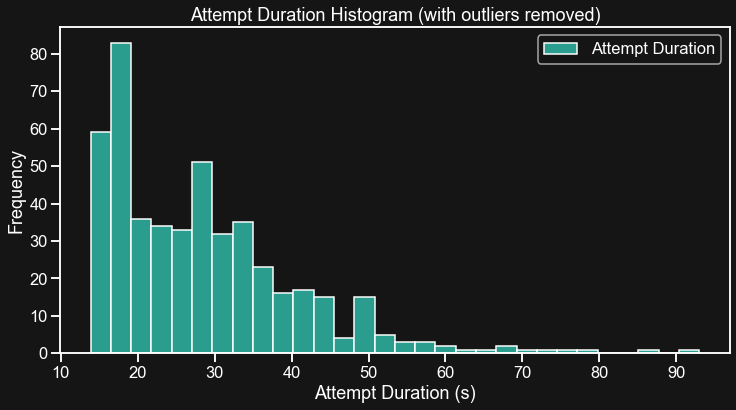

In [49]:
# plot attempt_duration
plt.figure(figsize=(12, 6))
df['attempt_duration'].plot(kind='hist', bins=30, color='#2a9d8f')
plt.xlabel('Attempt Duration (s)')
plt.legend(['Attempt Duration'])
plt.title('Attempt Duration Histogram (with outliers removed)')


In [50]:
df.head()

,accuracy,active_features,assessed_by,attempt,attempt_duration,hits,misses,project_from,target_w_penalty,test_completed_by,time_per_target,fitts_IDs
0,87.037037,{'particles': True},99207,0,27.633,47,7,3,2.104,4/4/2022 13:54:9,0.511,NaN
1,75.925926,{'particles': True},99207,1,29.0499,41,13,3,4.352,4/4/2022 13:54:51,0.537,NaN
2,75.925926,"{'current_target_border': True, 'particles': F...",99207,0,29.066,41,13,3,4.353,4/4/2022 14:0:15,0.538,NaN
3,96.296296,"{'animate_navigation_line': False, 'border_on_...",99209,0,25.9376,52,2,3,0.480,4/4/2022 16:33:5,0.480,NaN
4,92.592593,"{'animate_navigation_line': True, 'border_on_h...",99211,0,33.7788,50,4,3,1.107,4/4/2022 16:48:34,0.625,NaN


In [51]:
# create a variable features, where each feature is a key from df["active_features"]
features = {}
for active_features in df["active_features"]:
  for feature in active_features.keys():
    features[feature] = True

In [52]:
# create columns for the df, where each column is a key from features
# the goal, then, is to associate each row with a True or False flag for the feature, indicating if it was active or not for that attempt
for feature in features.keys():
  df[feature] = df["active_features"].apply(lambda x: x.get(feature, False))

In [53]:
# drop the active_features column, since it's no longer needed
df.drop(columns=["active_features"], inplace=True)

In [54]:
df.head()

,accuracy,assessed_by,attempt,attempt_duration,hits,misses,project_from,target_w_penalty,test_completed_by,time_per_target,...,animate_navigation_line,border_on_hover,navigation_lines,next_target_dim_color,background_color_feedback,sound_feedback,tutorial_screen,snapping,time_bar,alt_repetition_indicator
0,87.037037,99207,0,27.633,47,7,3,2.104,4/4/2022 13:54:9,0.511,...,False,False,False,False,False,False,False,False,False,False
1,75.925926,99207,1,29.0499,41,13,3,4.352,4/4/2022 13:54:51,0.537,...,False,False,False,False,False,False,False,False,False,False
2,75.925926,99207,0,29.066,41,13,3,4.353,4/4/2022 14:0:15,0.538,...,False,False,False,False,False,False,False,False,False,False
3,96.296296,99209,0,25.9376,52,2,3,0.480,4/4/2022 16:33:5,0.480,...,False,False,True,False,False,False,False,False,False,False
4,92.592593,99211,0,33.7788,50,4,3,1.107,4/4/2022 16:48:34,0.625,...,True,True,True,True,False,False,False,False,False,False


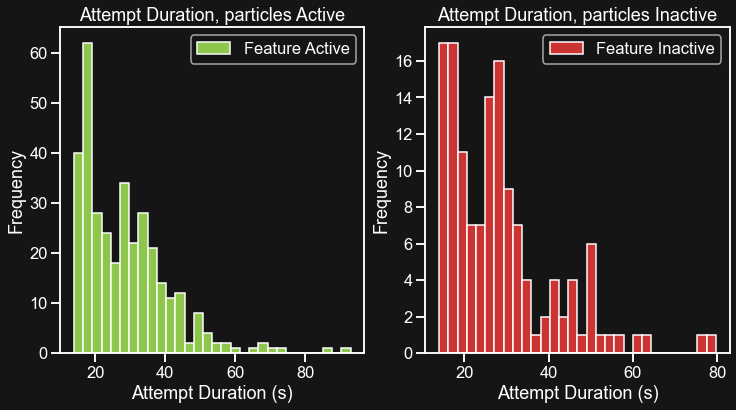

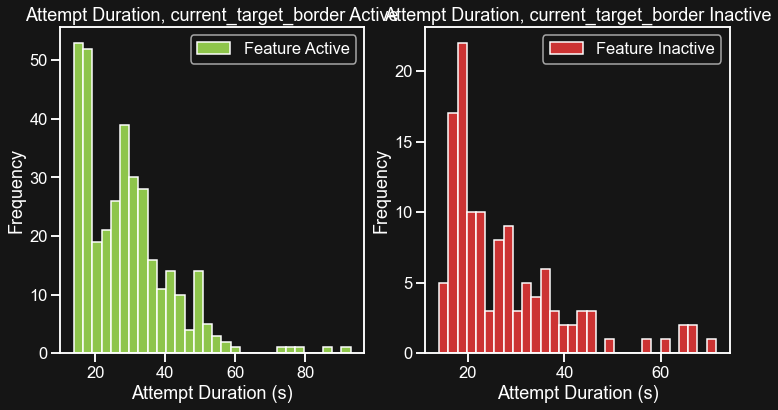

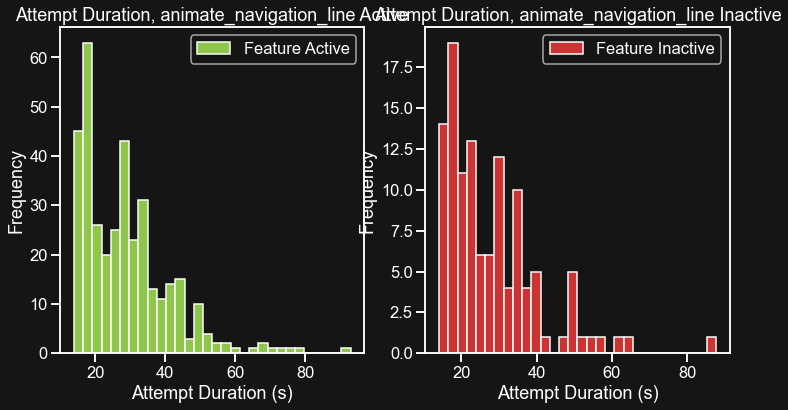

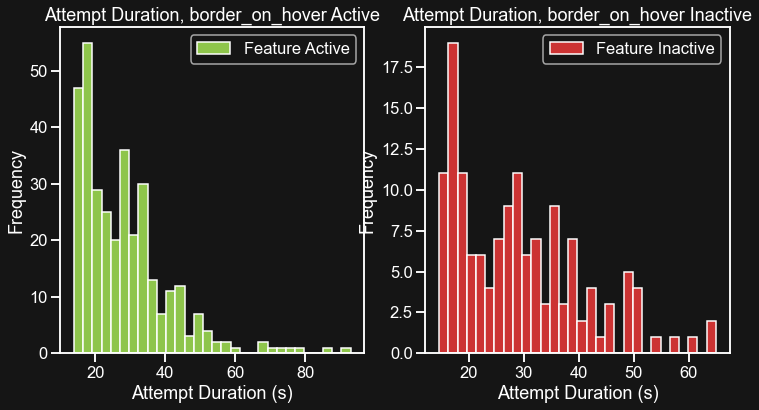

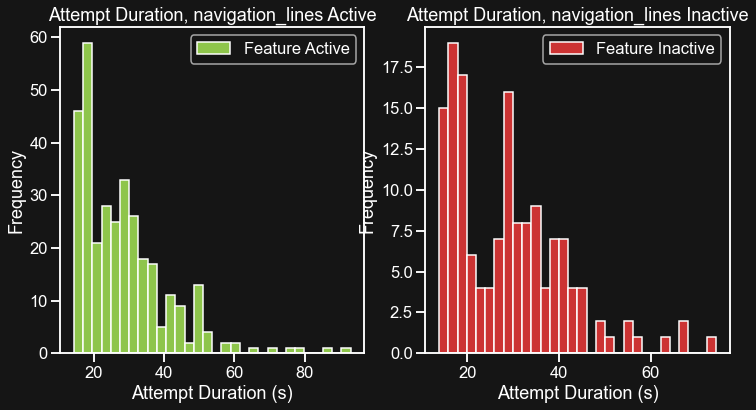

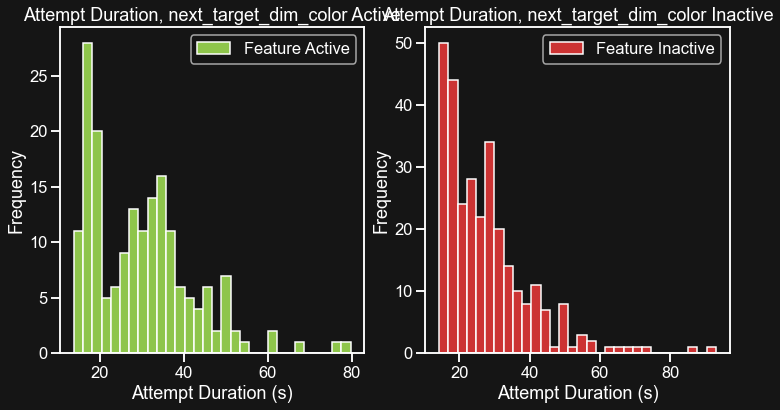

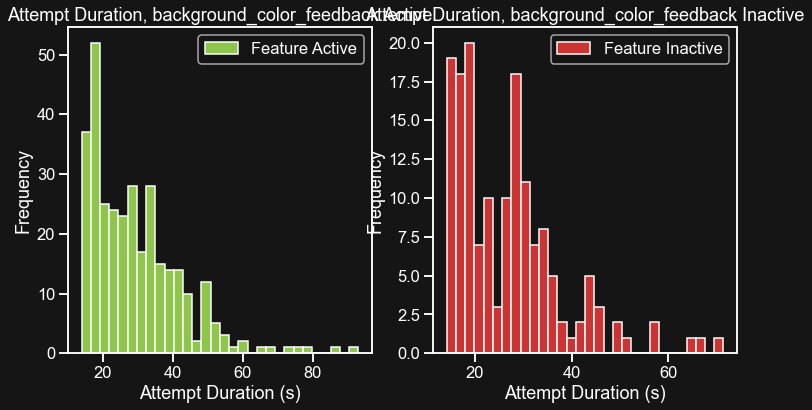

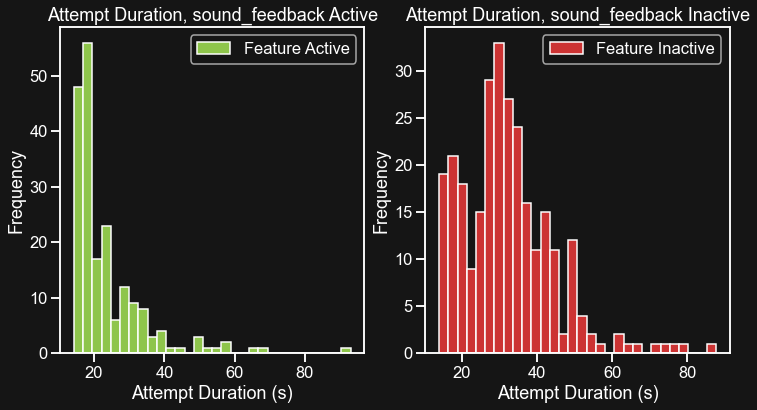

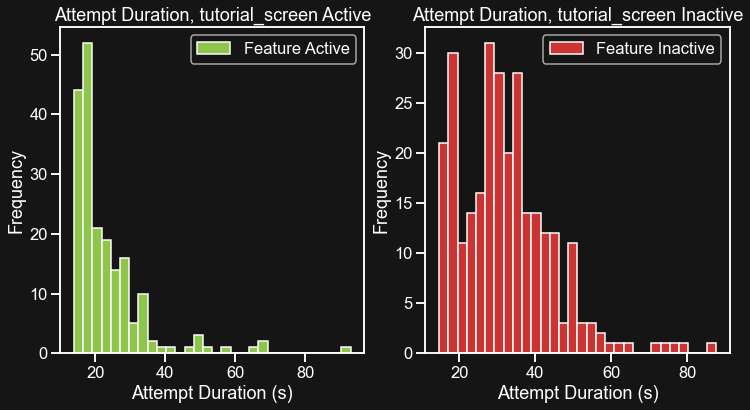

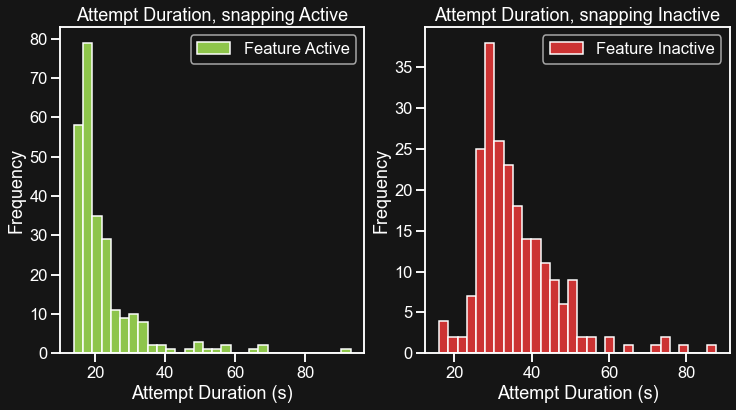

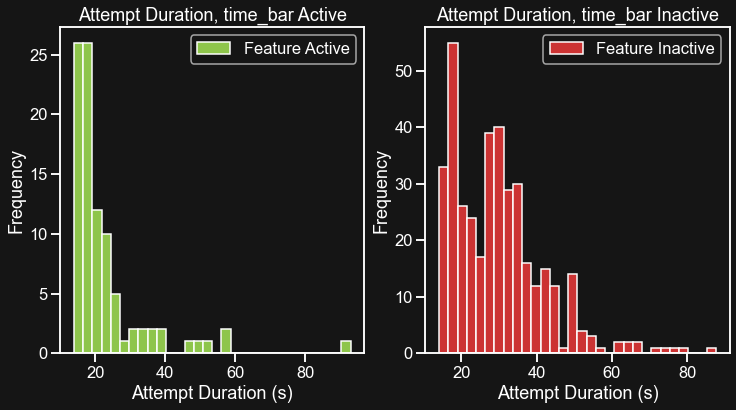

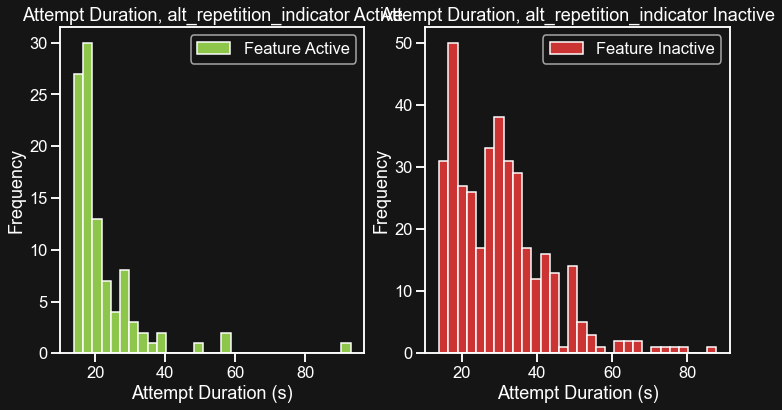

In [55]:
# histograms comparing attempt duration with each feature turned off vs on
# the histograms should be SIDE BY SIDE
for feature in features.keys():
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  df[df[feature] == True]["attempt_duration"].plot(kind='hist', bins=30, color='#8ec54b', ax=axes[0])
  df[df[feature] == False]["attempt_duration"].plot(kind='hist', bins=30, color='#cc3333', ax=axes[1])
  axes[0].xaxis.set_label_text('Attempt Duration (s)')
  axes[1].xaxis.set_label_text('Attempt Duration (s)')
  axes[0].legend(['Feature Active'])
  axes[1].legend(['Feature Inactive'])
  axes[0].set_title('Attempt Duration, {} Active'.format(feature))
  axes[1].set_title('Attempt Duration, {} Inactive'.format(feature))

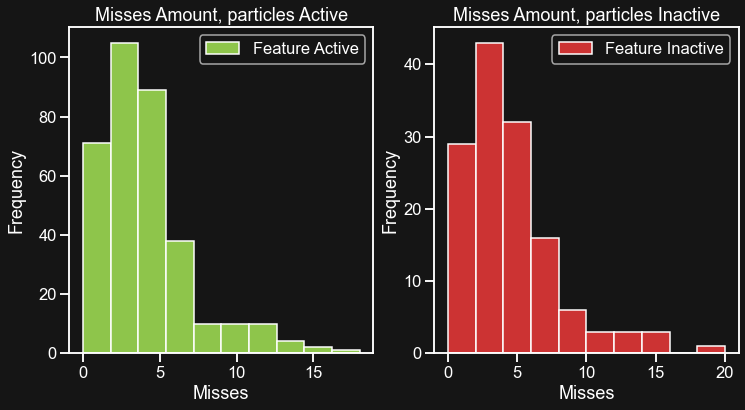

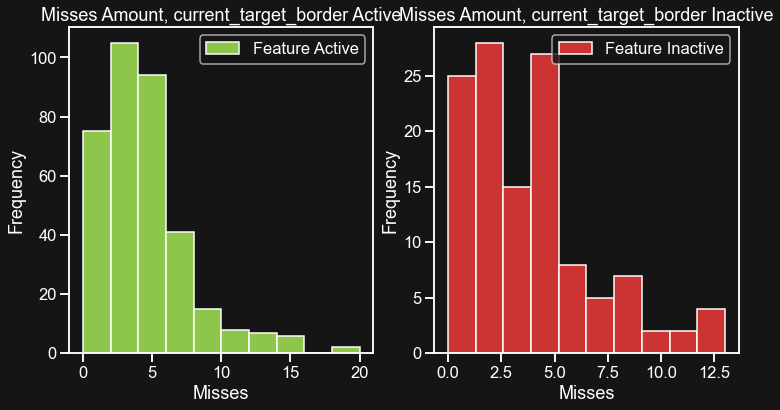

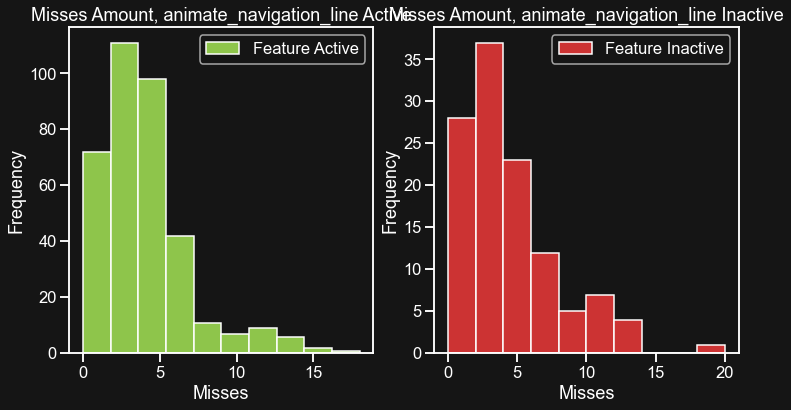

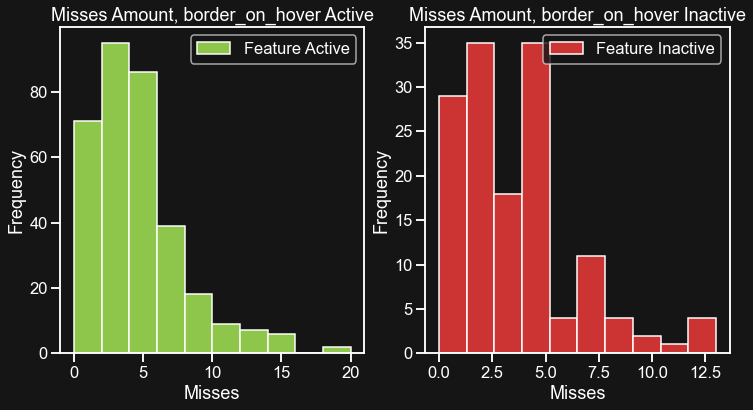

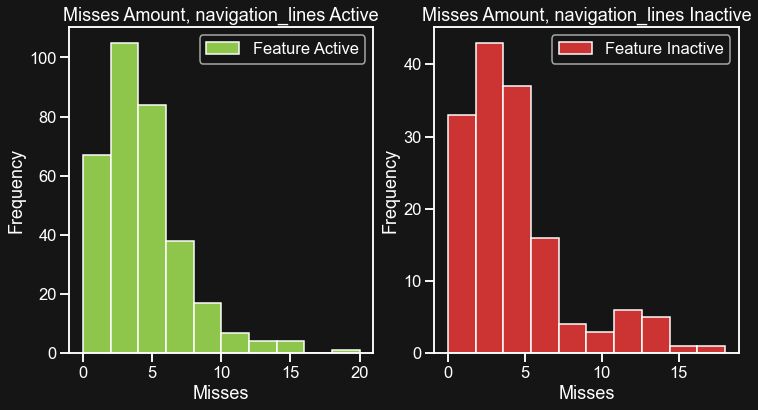

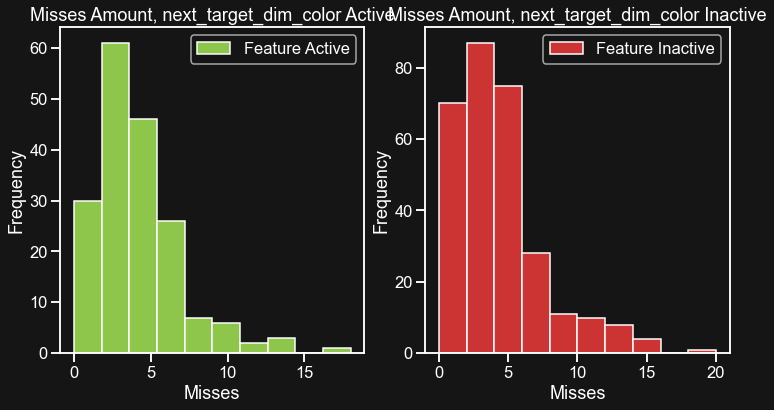

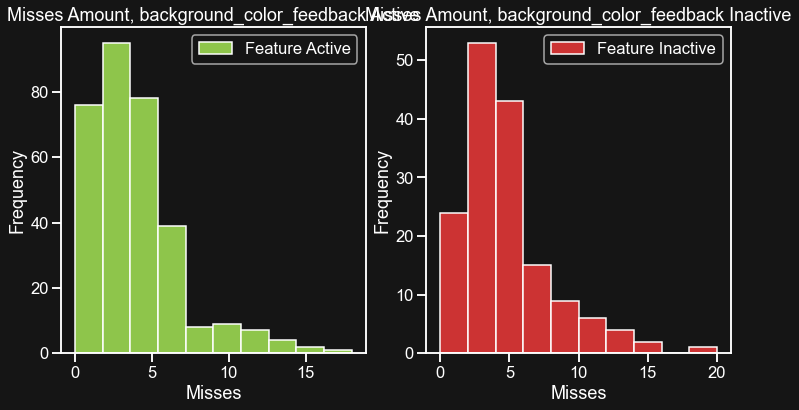

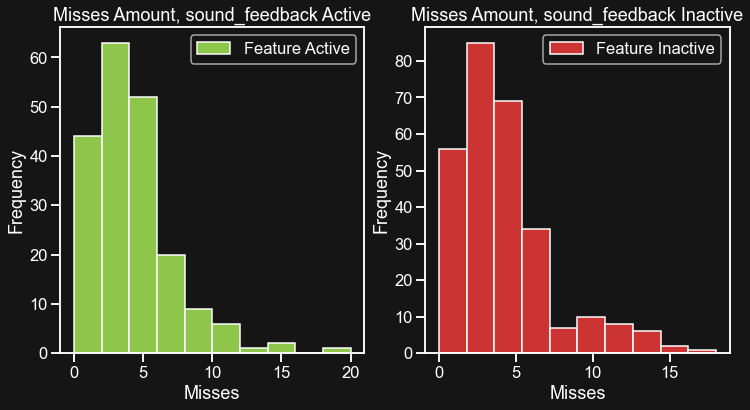

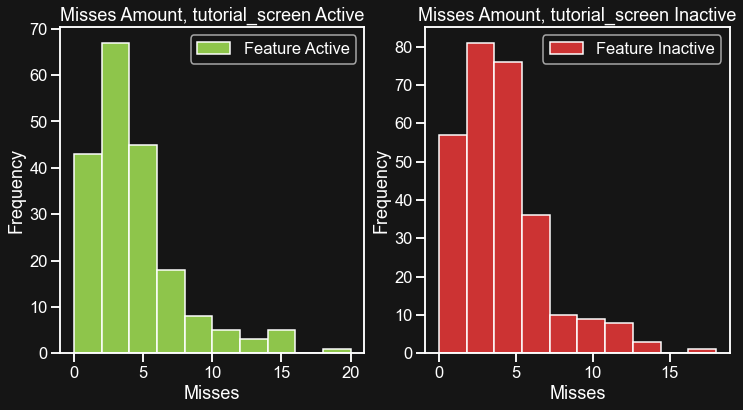

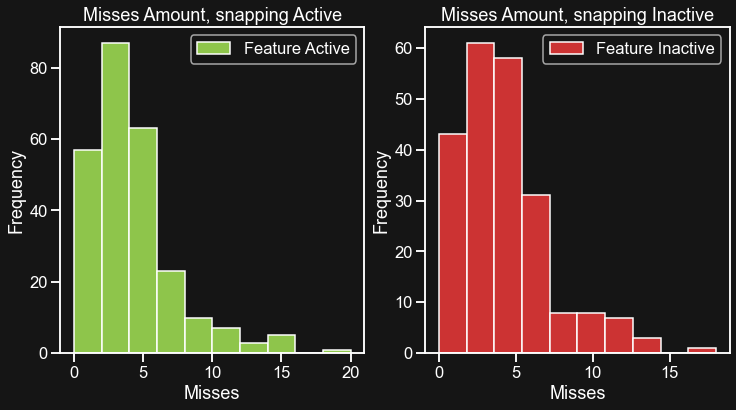

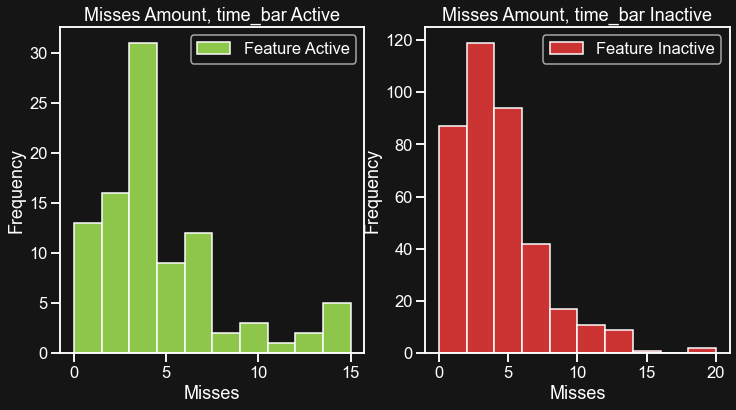

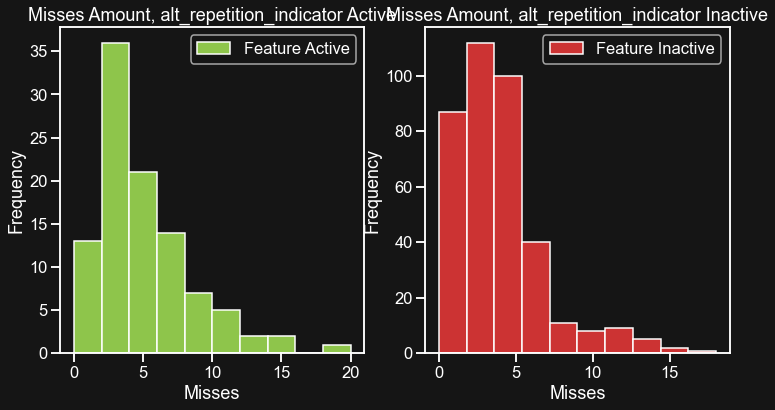

In [56]:
# histograms comparing misses with each feature turned off vs on
for feature in features.keys():
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  df[df[feature] == True]["misses"].plot(kind='hist', color='#8ec54b', ax=axes[0])
  df[df[feature] == False]["misses"].plot(kind='hist', color='#cc3333', ax=axes[1])
  axes[0].xaxis.set_label_text('Misses')
  axes[1].xaxis.set_label_text('Misses')
  axes[0].legend(['Feature Active'])
  axes[1].legend(['Feature Inactive'])
  axes[0].set_title('Misses Amount, {} Active'.format(feature))
  axes[1].set_title('Misses Amount, {} Inactive'.format(feature))

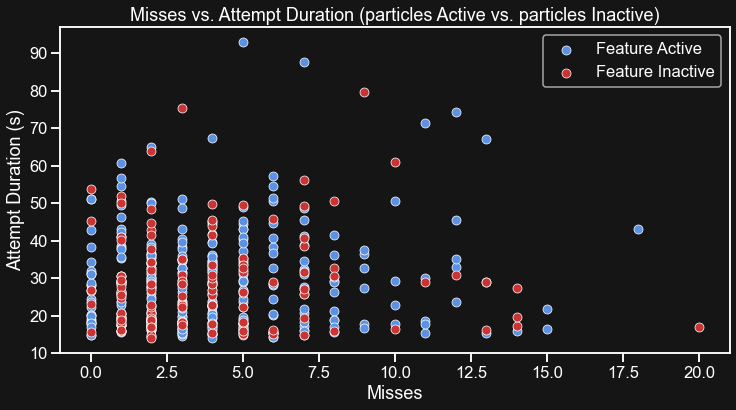

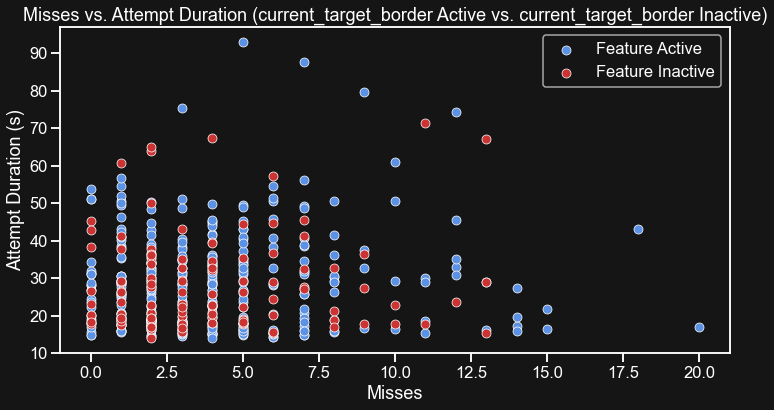

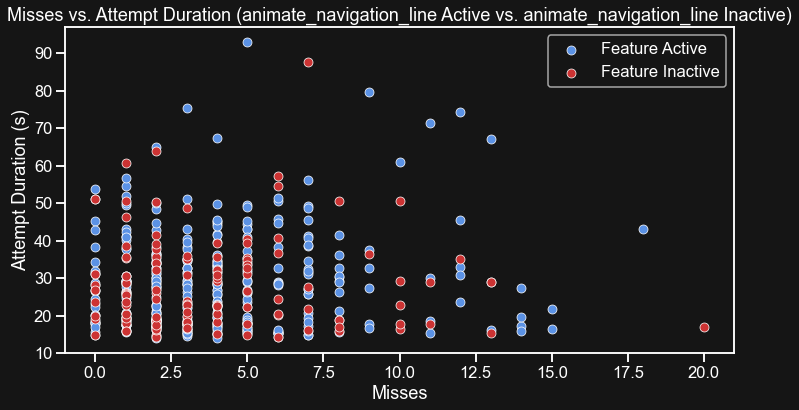

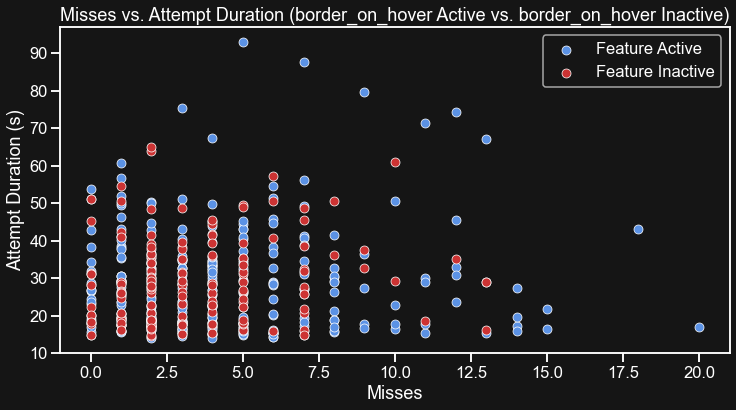

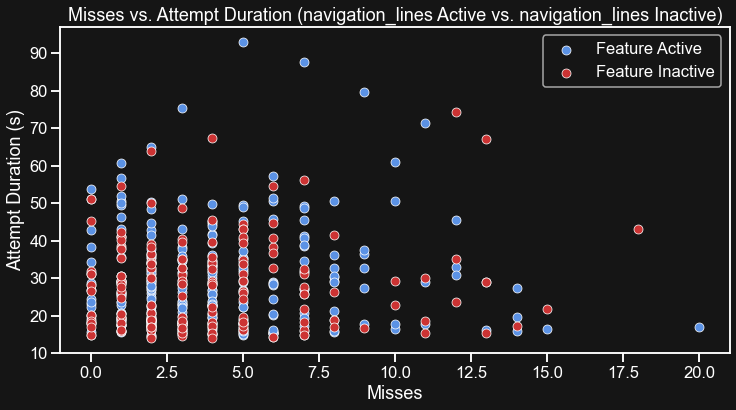

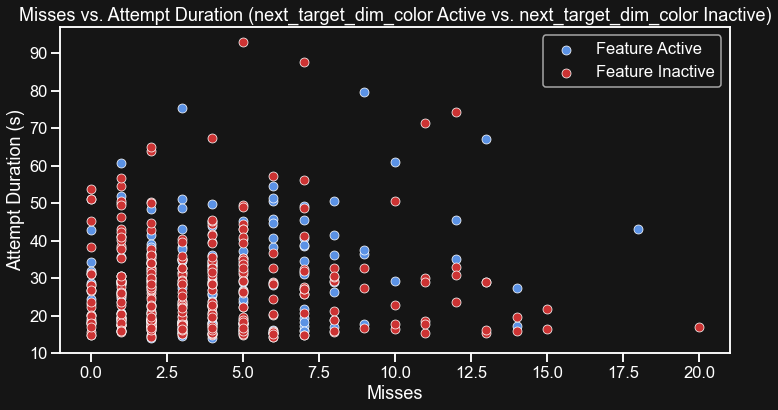

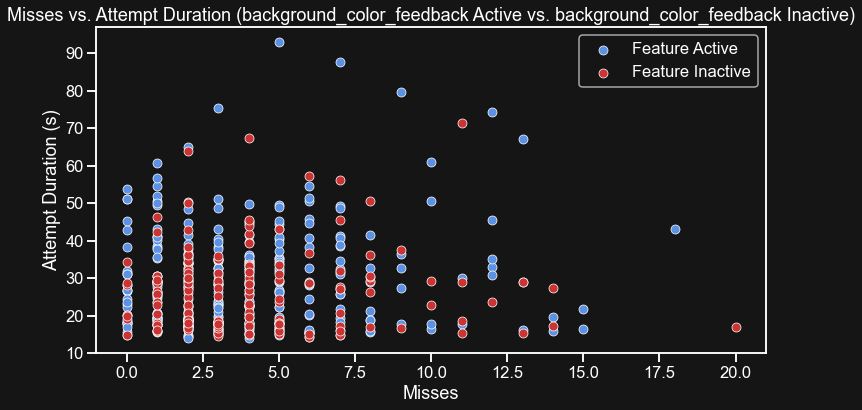

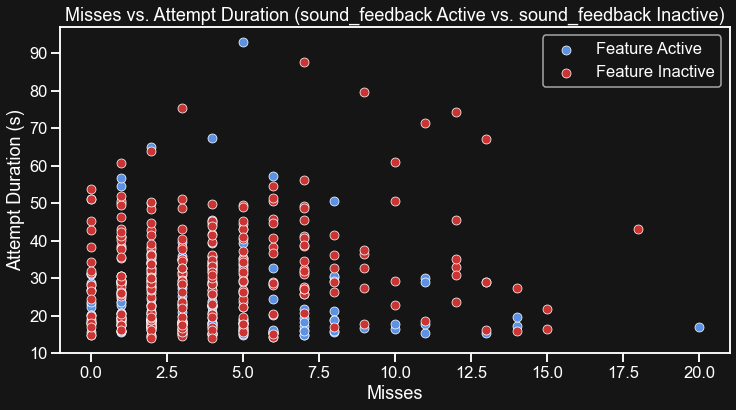

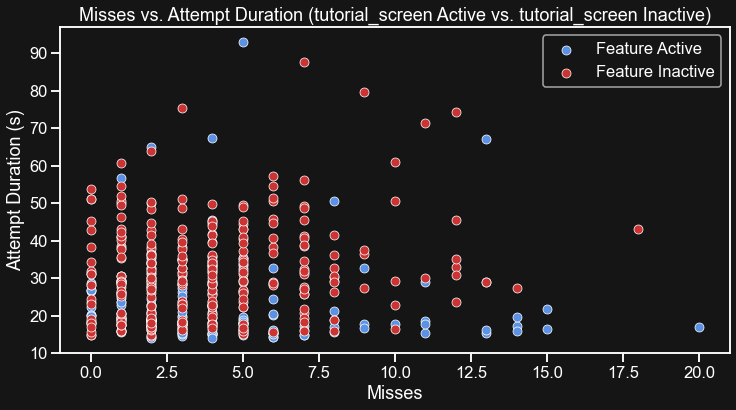

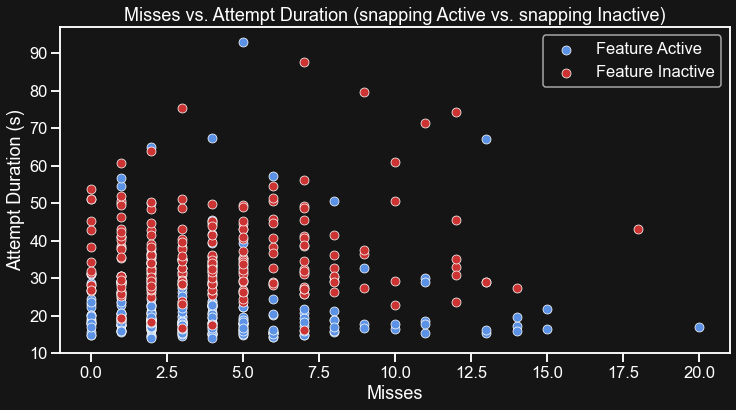

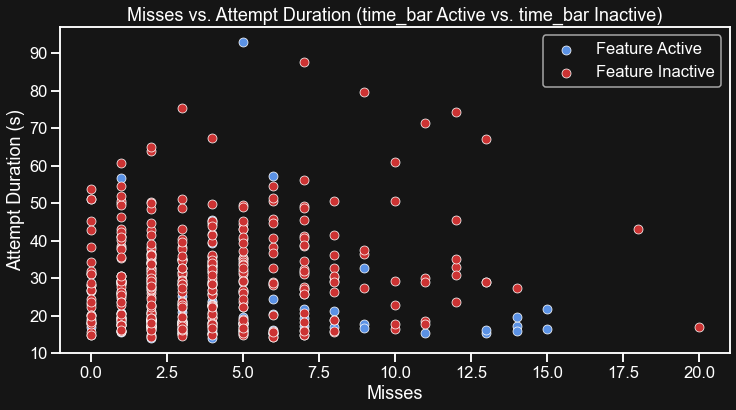

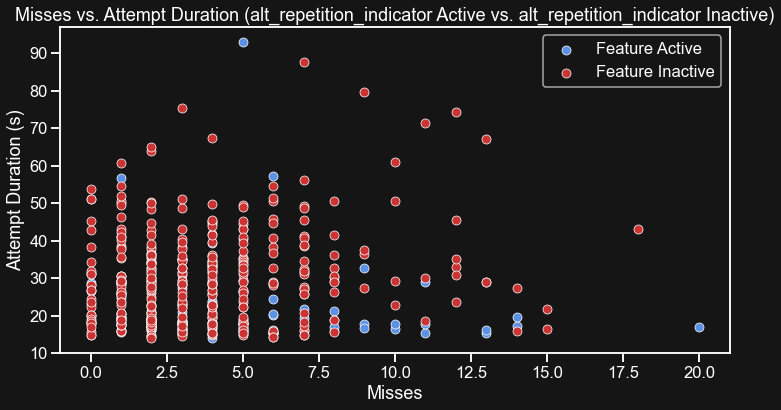

In [57]:
# scatter plots comparing misses with each feature turned off vs on
for feature in features.keys():
  plt.figure(figsize=(12, 6))
  sns.scatterplot(x=df[df[feature] == True]["misses"], y=df[df[feature] == True]["attempt_duration"], color='#5b92e5')
  sns.scatterplot(x=df[df[feature] == False]["misses"], y=df[df[feature] == False]["attempt_duration"], color='#cc3333')
  plt.xlabel('Misses')
  plt.ylabel('Attempt Duration (s)')
  plt.legend(['Feature Active', 'Feature Inactive'])
  plt.title('Misses vs. Attempt Duration ({Feature} Active vs. {Feature} Inactive)'.format(Feature=feature))

In [58]:
# aux dataframe, where snapping is true
aux_df = df[df["snapping"] == True]

Text(0.5, 1.0, 'Misses, Time Bar Inactive')

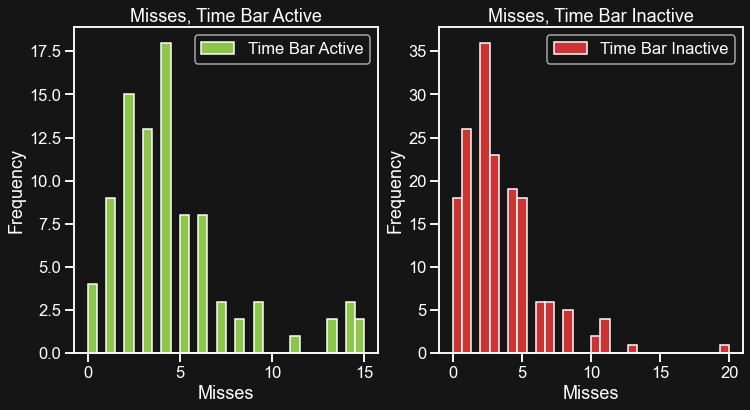

In [59]:
# plot side by side histograms (from aux_df) comparing misses with time_bar on and off
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
aux_df[aux_df["time_bar"] == True]["misses"].plot(kind='hist', bins=30, color='#8ec54b', ax=axes[0])
aux_df[aux_df["time_bar"] == False]["misses"].plot(kind='hist', bins=30, color='#cc3333', ax=axes[1])
axes[0].xaxis.set_label_text('Misses')
axes[1].xaxis.set_label_text('Misses')
axes[0].legend(['Time Bar Active'])
axes[1].legend(['Time Bar Inactive'])
axes[0].set_title('Misses, Time Bar Active')
axes[1].set_title('Misses, Time Bar Inactive')

In [60]:
# change aux_df["target_w_penalty"] type from str to float
aux_df["target_w_penalty"] = aux_df["target_w_penalty"].astype(float)
df["target_w_penalty"] = df["target_w_penalty"].astype(float)

/tmp/ipykernel_48571/3301384592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_df["target_w_penalty"] = aux_df["target_w_penalty"].astype(float)


Text(0.5, 1.0, 'Target w/ Penalty, Time Bar Inactive')

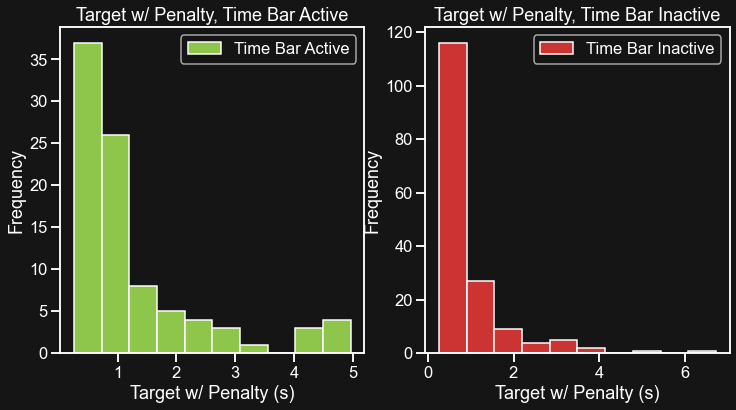

In [61]:
# plot side by side histograms (from aux_df) comparing target_w_penalty with time_bar on and off
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
aux_df[aux_df["time_bar"] == True]["target_w_penalty"].plot(kind='hist', color='#8ec54b', ax=axes[0])
aux_df[aux_df["time_bar"] == False]["target_w_penalty"].plot(kind='hist', color='#cc3333', ax=axes[1])
axes[0].xaxis.set_label_text('Target w/ Penalty (s)')
axes[1].xaxis.set_label_text('Target w/ Penalty (s)')
axes[0].legend(['Time Bar Active'])
axes[1].legend(['Time Bar Inactive'])
axes[0].set_title('Target w/ Penalty, Time Bar Active')
axes[1].set_title('Target w/ Penalty, Time Bar Inactive')